In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Upload the dataset from your local machine
from google.colab import files
uploaded = files.upload()

# Load the data
df = pd.read_csv('AirPassengers.csv', parse_dates=True, index_col='Month')  # Adjust the column names as necessary
df.index = pd.to_datetime(df.index)
print(df.head())


Saving AirPassengers.csv to AirPassengers.csv
            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


Dataset
The dataset, AirPassengers.csv, includes monthly totals of international airline passengers from 1949 to 1960. It is a standard dataset commonly used for time series modeling and forecasting.

Features
The dataset includes the following columns:

Month: The month of the observation (from January 1949 to December 1960
Passengers: The number of international airline passengers in thousands.

In [ ]:
# Decompose the time series
decomposition = seasonal_decompose(df['#Passengers'], model='multiplicative', period=12)  # or 'additive' depending on the nature of the series

# Extract the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


Analysis Performed
The Python script performs the following steps:

Data Loading: Load the AirPassengers.csv file into a pandas DataFrame with months parsed as datetime indices.
Time Series Decomposition:
Trend Component: Represents the increasing or decreasing value in the series.
Seasonal Component: Shows patterns that repeat within a fixed period, in this case, yearly.
Residual Component: The randomness or noise left after extracting the trend and seasonal components.

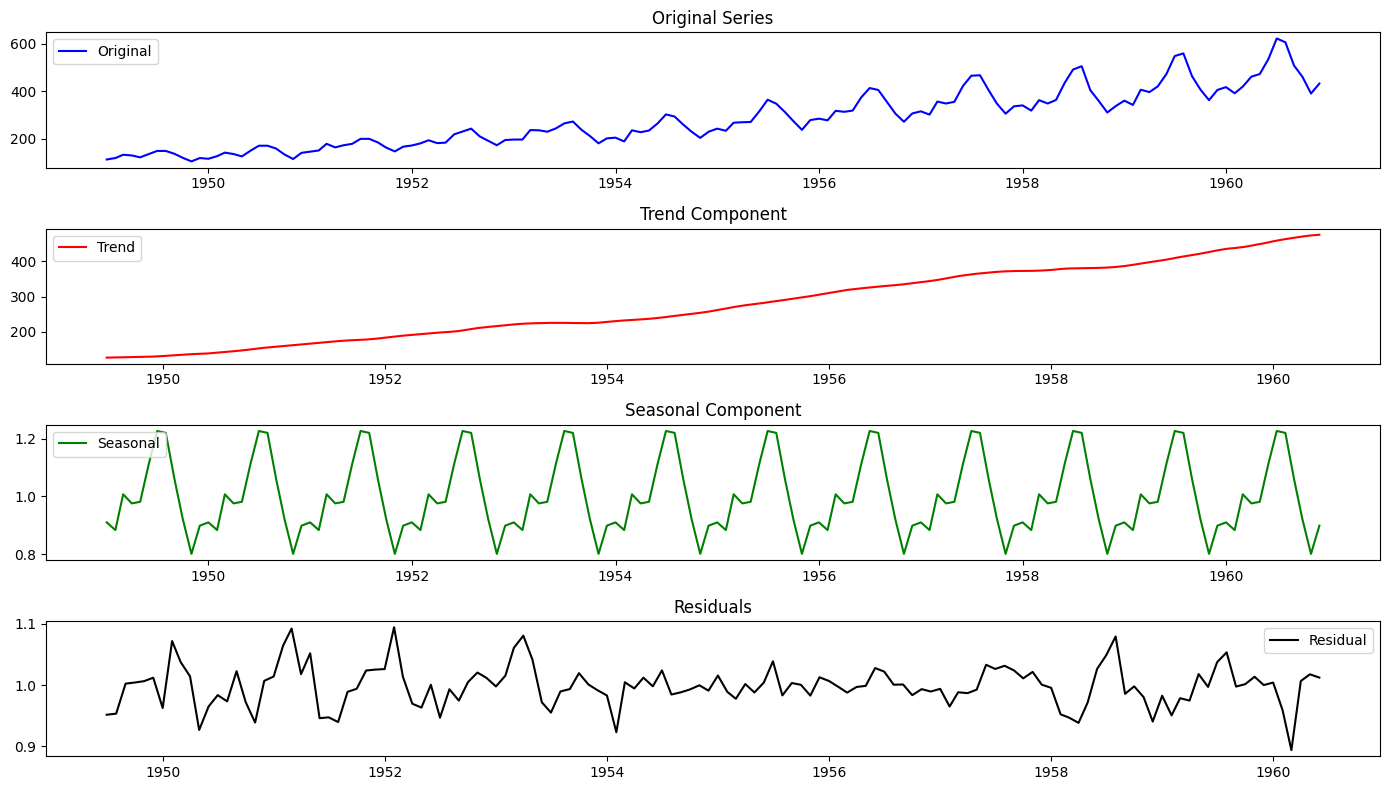

In [ ]:
# Plot the original data, the trend, the seasonality, and the residuals
plt.figure(figsize=(14, 8))

plt.subplot(411)
plt.plot(df['#Passengers'], label='Original', color='blue')
plt.legend(loc='best')
plt.title('Original Series')

plt.subplot(412)
plt.plot(trend, label='Trend', color='red')
plt.legend(loc='best')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='green')
plt.legend(loc='best')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(residual, label='Residual', color='black')
plt.legend(loc='best')
plt.title('Residuals')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Load the dataset
df = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')
df.index = pd.to_datetime(df.index)

# Perform Augmented Dickey-Fuller test
result = adfuller(df['#Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
